In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
print(tf.__version__)
print(keras.__version__)

2.0.0
2.2.4-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

In [5]:
2**8  # pixel values are integers from 0-255

256

### Create a validation set
Also, scale the inputs since we are using gradient descent. Why? Because similarly sized features make the convergence faster: https://www.quora.com/Why-is-it-important-to-scale-your-inputs-in-gradient-descent

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
np.unique(y_train_full) 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
# indexes correspond to the values in the labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
               'Sneaker', 'Bag', 'Ankle boot']

In [9]:
class_names[y_train[100]]

'Pullover'

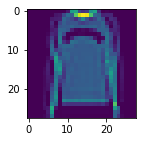

In [42]:
from matplotlib import pyplot as plt
plt.figure(figsize = (2, 2))
plt.imshow(X_train[100], interpolation='nearest', cmap='viridis')
plt.show()

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# Alternately, pass it as a list:
# model = keras.models.Sequential(
#     [
#         keras.layers.Flatten(input_shape=[28, 28]),
#         keras.layers.Dense(300, activation="relu"),
#         keras.layers.Dense(100, activation="relu"),
#         keras.layers.Dense(10, activation="softmax"),
#     ]
# )

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Param. calculation example:
# number of inputs (28*28)
# number of neurons in the first layer (300)
# one bias for each neuron (300)
28*28 * 300 + 300

235500

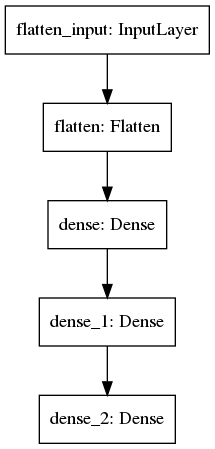

In [18]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [37]:
model.layers

In [38]:
hidden1 = model.layers[1]

In [39]:
print(model.layers[1].name)
model.get_layer('dense') is hidden1

dense


True

In [40]:
weights, biases = hidden1.get_weights()
weights

array([[-0.06954738, -0.02683677, -0.04706717, ...,  0.0180511 ,
        -0.07309972, -0.06543081],
       [-0.03272482,  0.00332236,  0.05839685, ..., -0.03044889,
        -0.00413053,  0.05263844],
       [ 0.03689788,  0.03403307,  0.02815185, ...,  0.05438462,
        -0.05939174,  0.00122452],
       ...,
       [-0.04388629, -0.02177579,  0.00137188, ..., -0.01447911,
        -0.03391032, -0.01621142],
       [ 0.03625672,  0.06198326,  0.01627166, ..., -0.03149438,
        -0.04223708,  0.01270705],
       [-0.00136945, -0.06805342, -0.0663549 , ..., -0.04226289,
        -0.02610074,  0.02736767]], dtype=float32)

In [41]:
weights.shape, biases.shape

((784, 300), (300,))